### Step 1: Setting up the environment

In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


### Step 2: Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 3: Load and Explore the Dataset

In [3]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Display the shape of the dataset
print(f'Dataset shape: {X.shape}')
print(f'Target shape: {y.shape}')

# Display the first few rows of the dataset
print(X.head())
print(y.head())

Dataset shape: (70000, 784)
Target shape: (70000,)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781

### Step 4: Preprocess the Data

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 56000 samples
Testing set size: 14000 samples


### Step 5: Train a Logistic Regression Model

In [6]:
# Create the logistic regression model
model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')

# Train the model
model.fit(X_train, y_train)


c:\Users\Sambhav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sambhav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, multi_class='auto')

### Step 6: Make Predictions

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print('First few predictions:', y_pred[:5])
print('First few actual values:', y_test.values[:5])

First few predictions: ['8' '4' '5' '7' '7']
First few actual values: ['8', '4', '8', '7', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


### Step 7: Evaluate the Model

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.9161428571428571
Confusion Matrix:
[[1284    1   10    1    1   13   22    3    6    2]
 [   0 1553    6   11    3    6    0    4   15    2]
 [   7   16 1231   21   14   13   21   17   29   11]
 [   7   11   34 1274    1   41    7   18   20   20]
 [   6    3   11    4 1182    5   12    9   10   53]
 [  11   11    9   42   12 1110   22    2   39   15]
 [   6    3   18    3   14   20 1326    2    4    0]
 [   5    4   23    5   11    7    0 1408    2   38]
 [  10   28   16   38    6   40   12   10 1176   21]
 [   6    9    5   14   37    6    0   47   14 1282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.91      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0

### Step 8: Visualize the Results

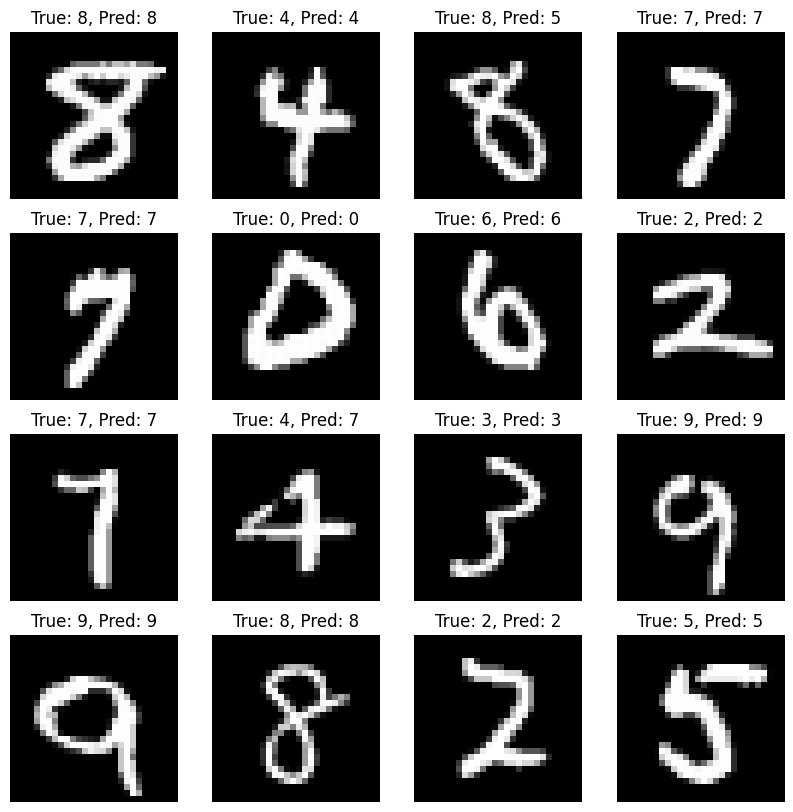

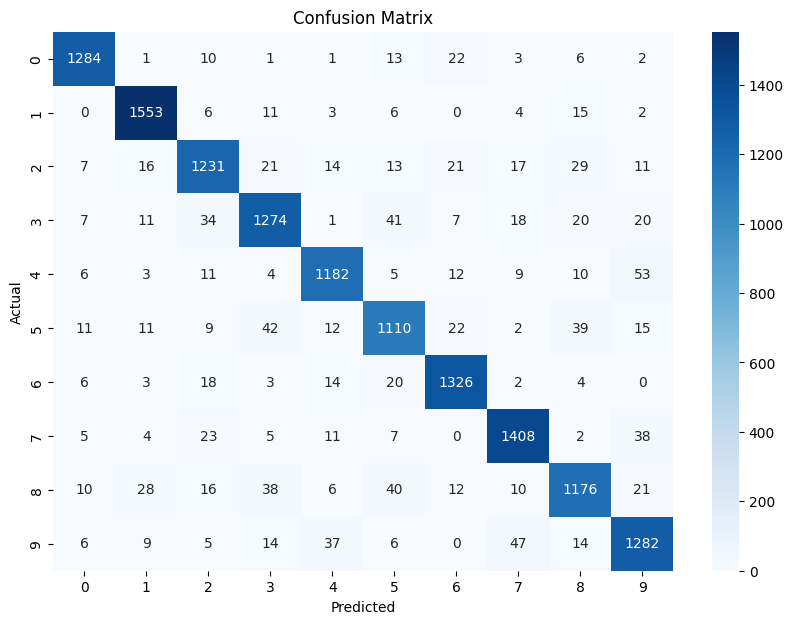

In [9]:
# Visualize some of the test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test.iloc[i]}, Pred: {y_pred[i]}')
    plt.axis('off')
plt.show()

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 9: Save the Model

In [10]:
# Save the model to a file
joblib.dump(model, 'mnist_logistic_regression_model.pkl')

# Load the model from a file
# model = joblib.load('mnist_logistic_regression_model.pkl')

['mnist_logistic_regression_model.pkl']